# Objetivo: Realizar regressões entre todas as variáveis do conjunto de dados 'Cars93' e escolher os melhores pares de variaveis.

In [6]:
 #Importando bibliotecas

import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# Separando os dados de interesse

df = pd.read_csv('Cars93.csv')
dados = df[['Min.Price', 'Price', 'Max.Price', 'MPG.city','MPG.highway','EngineSize','Horsepower' , 'RPM','Width', 'Weight']]

## GRAFICOS DA REGRESSÃO

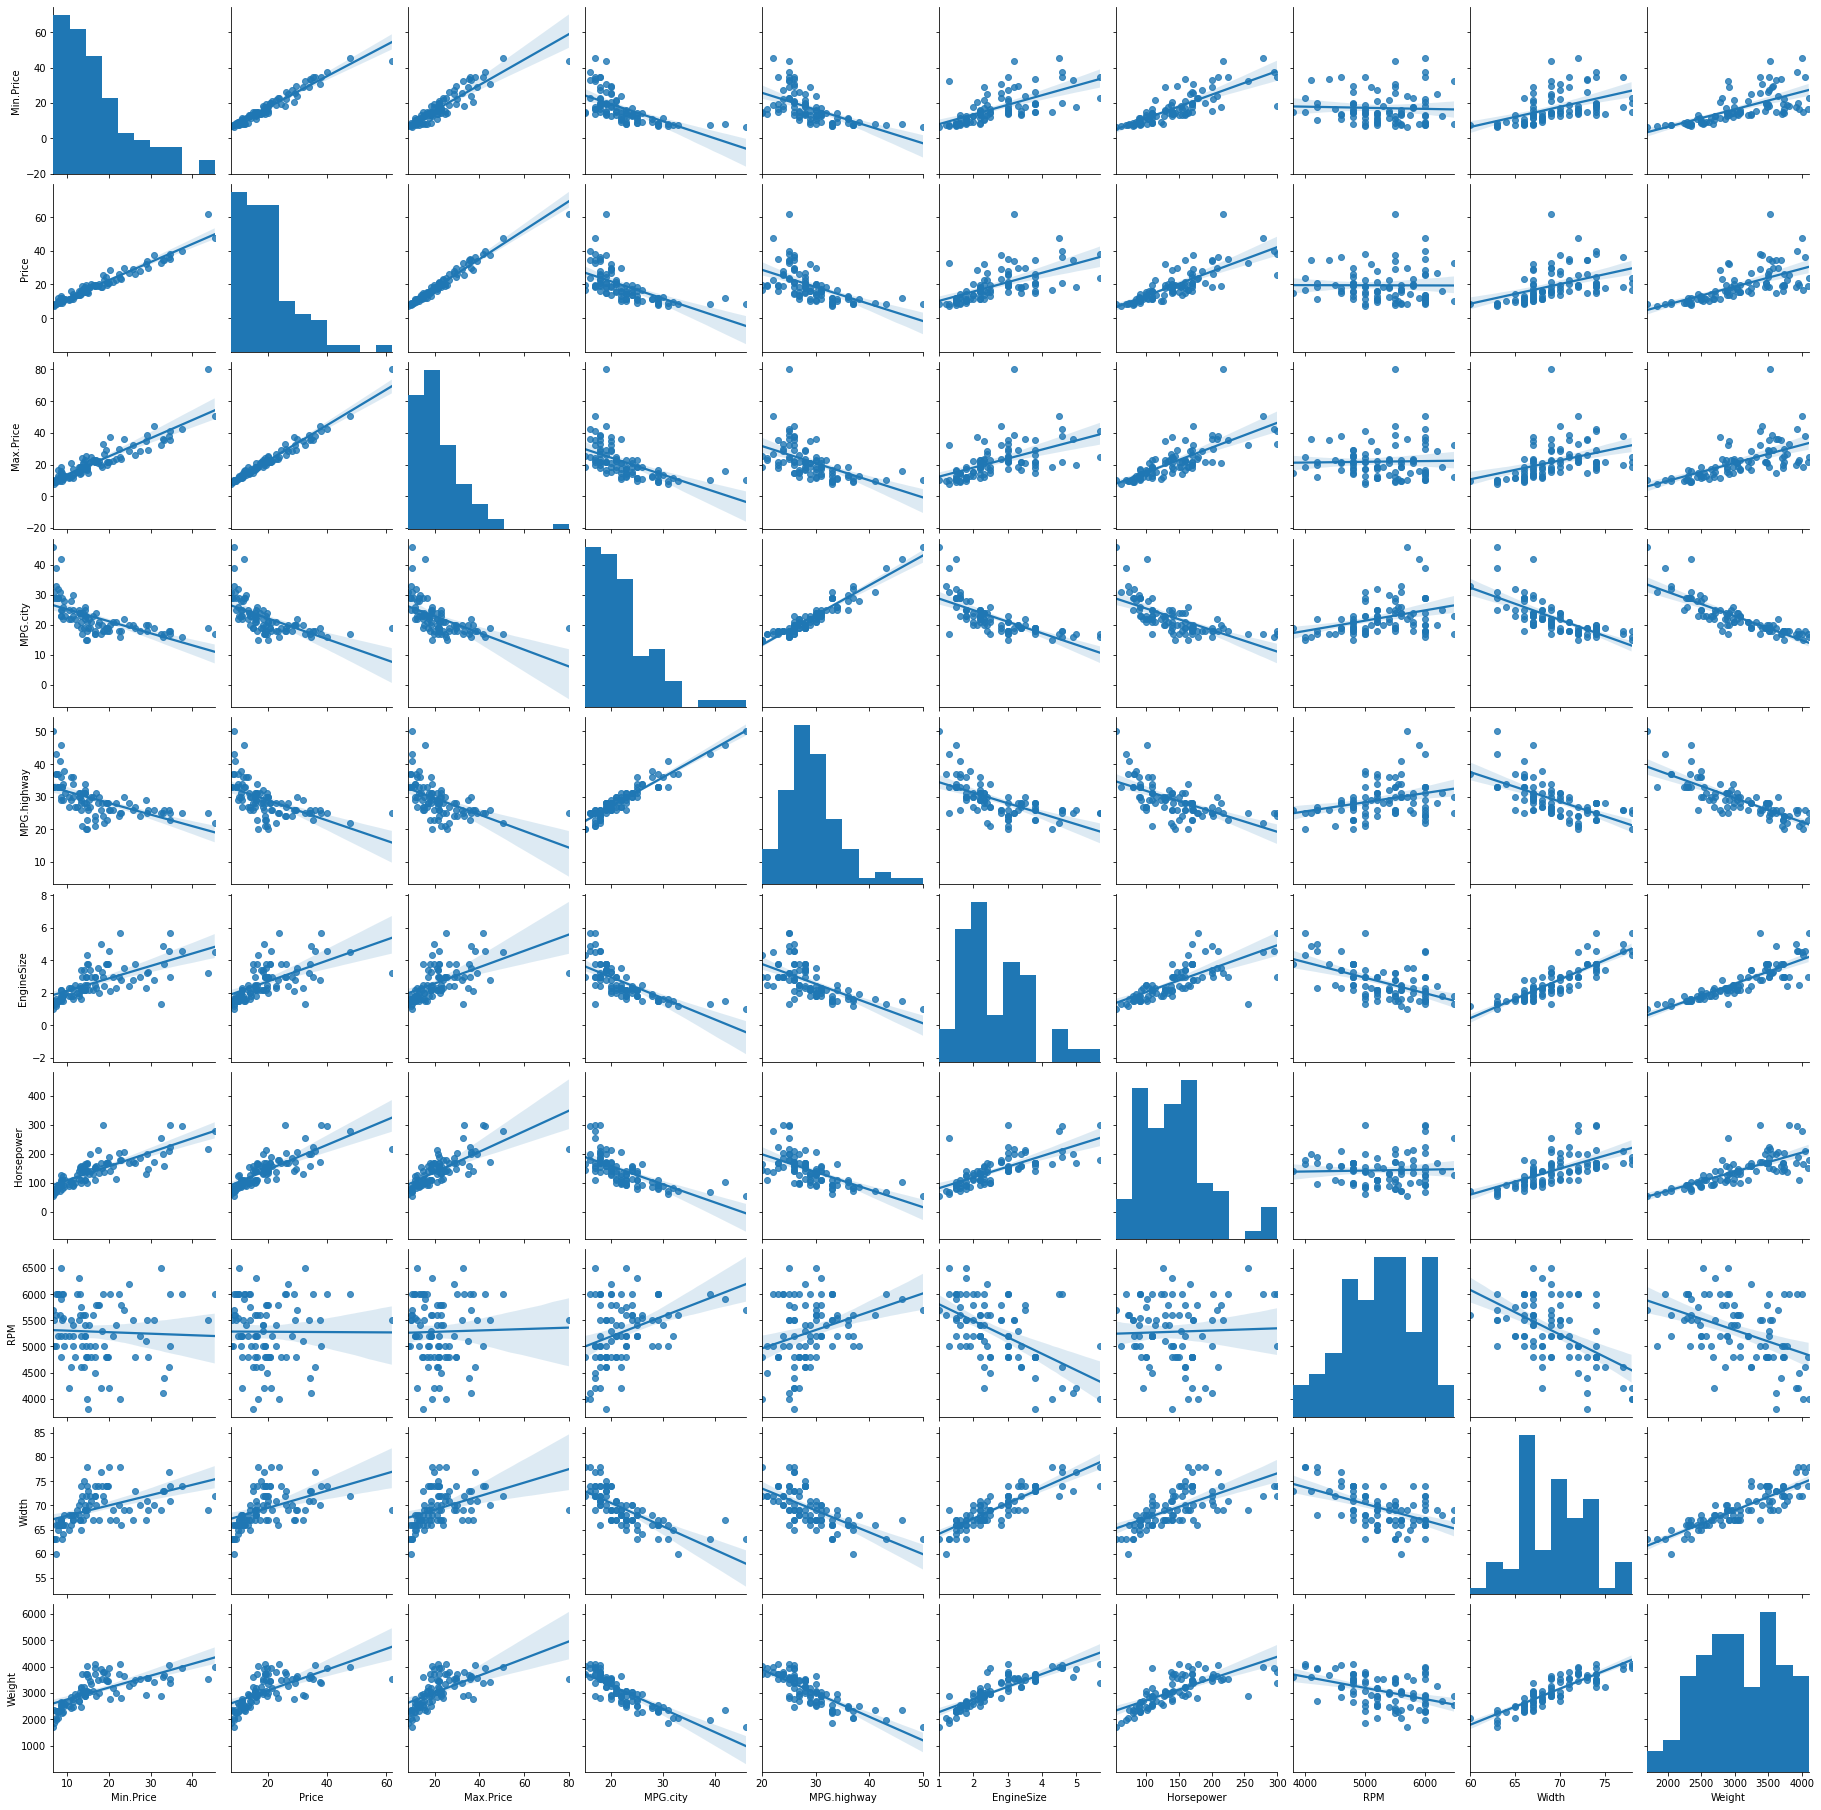

In [8]:

reg_plot = sns.pairplot(dados, kind="reg")

## LOOP DA REGRESSÃO

In [10]:
regressoes = [('Min.Price','Price'),('Min.Price','Max.Price'), ('Min.Price','MPG.city'),('Min.Price','MPG.highway'),('Min.Price','EngineSize'),('Min.Price','Horsepower'), ('Min.Price','RPM'),('Min.Price','Width'),('Min.Price','Weight'),
              ('Price','Max.Price'), ('Price','MPG.city'), ('Price','MPG.highway'), ('Price','EngineSize'), ('Price','Horsepower'), ('Price','RPM'), ('Price','Width'), ('Price','Weight'),
              ('Max.Price','MPG.city'),('Max.Price','MPG.highway'),('Max.Price','EngineSize'),('Max.Price','Horsepower'),('Max.Price','RPM'),('Max.Price','Width'), ('Max.Price','Weight'),
              ('MPG.city','MPG.highway'),('MPG.city','EngineSize'),('MPG.city','Horsepower'),('MPG.city','RPM'),('MPG.city','Width'),('MPG.city','Weight'),
              ('MPG.highway','EngineSize'),('MPG.highway','Horsepower'),('MPG.highway','RPM'),('MPG.highway','Width'),('MPG.highway','Weight'),
              ('EngineSize','Horsepower'),('EngineSize','RPM'),('EngineSize','Width'),('EngineSize','Weight'),
              ('Horsepower','RPM'),('Horsepower','Weight'),('Horsepower','Weight'),
              ('RPM','Weight'),('RPM','Weight'),
              ('Width','Weight')]

In [11]:
r_square = []

for tupla in regressoes:

  var1 = dados[tupla[0]]
  var2 = dados[tupla[1]]
  
  _,_,r2,_,_ = stats.linregress(var1,var2)
  r_square.append(r2)

In [12]:
# Tabela com todas as regressões

#pd.DataFrame({'R2':r_square})
tabela = pd.DataFrame(regressoes, columns = ['Var 1', 'Var 2'])
tabela['R_square'] = r_square
tabela

,Var 1,Var 2,R_square
0,Min.Price,Price,0.970601
1,Min.Price,Max.Price,0.906756
2,Min.Price,MPG.city,-0.622875
3,Min.Price,MPG.highway,-0.579966
4,Min.Price,EngineSize,0.645488
5,Min.Price,Horsepower,0.802444
6,Min.Price,RPM,-0.042598
7,Min.Price,Width,0.492878
8,Min.Price,Weight,0.666554
9,Price,Max.Price,0.981580


In [13]:
# Selecionando as melhores combinações do modelo de regressão

tabela[(tabela.R_square >= 0.7)]

,Var 1,Var 2,R_square
0,Min.Price,Price,0.970601
1,Min.Price,Max.Price,0.906756
5,Min.Price,Horsepower,0.802444
9,Price,Max.Price,0.981580
13,Price,Horsepower,0.788218
20,Max.Price,Horsepower,0.744445
24,MPG.city,MPG.highway,0.943936
35,EngineSize,Horsepower,0.732120
37,EngineSize,Width,0.867110
38,EngineSize,Weight,0.845075
